## Part1. 기계학습
- 예측과 분류를 하는 모델제작
    - 정형데이터 (숫자, 문자, 날짜) : 머신러닝 (통계적, sklearn)
    - 비정형데이터 (이미지, 소리, 영상, 문장) : 딥러닝 (인공신경망, tensorflow)

    - 지도학습 : y값을 제공함
    - 비지도학습 : y값 없음

## Part2. 딥러닝기초, 지도학습

#### [2-1] 모듈 import
- import 폴더명 as 별명 : 폴더명의 __init__.py를 실행
- from 폴더명 import 파일명 : 폴더안의 파일명 .py를 실행
- 추후에는 설치해야하는 모듈과 버전이 프로젝트에 따라서 계속 달라짐
    - 반드시 가상환경을 권장하고, 별도의 txt파일에 설치할 모듈명만 따로 보관

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Part3. 기계학습에 사용되는 데이터셋
- 반드시 array 여야함 (numpy)
    - 이미지는 PIL로 open해서 np.array로 배열화를 시키거나 <br>
    openCV로 처음부터 array로 읽기 때문에 array에 대한 고민이 없음
    - 정형자료중에 pandas로 읽은 자료는 array로 변경해줘야 함
- 텐서플로우에 넣는 자료는 텐서형이여야함 (스칼라-벡터-array-텐서)
    - array자료를 지정하면 알아서 텐서형으로 변경해줌
    - 제작이 끝난 모델에 새로운 자료를 한개만 넣을때는 텐서형이어야함 (사용자가 해줘야함) (model.predict 할때)

In [5]:
# 판다스를 array로 변경
key = [180.5,165,160,170,180]
age = [20,15,35,15,40]
혈압 = [130,140,135,185,140]

df = pd.DataFrame({'key':key, 'age':age, '혈압':혈압})
df

,key,age,혈압
0,180.5,20,130
1,165.0,15,140
2,160.0,35,135
3,170.0,15,185
4,180.0,40,140


In [7]:
x = df[['key','age']].values
x = x.astype('float32')
x

array([[180.5,  20. ],
       [165. ,  15. ],
       [160. ,  35. ],
       [170. ,  15. ],
       [180. ,  40. ]], dtype=float32)

In [8]:
y = df['혈압'].values
y

array([130, 140, 135, 185, 140], dtype=int64)

In [9]:
x.shape

(5, 2)

In [10]:
y.shape

(5,)

In [11]:
newX = [170,35]
#model.predict(newX)
np.shape(newX)

(2,)

In [12]:
newX = [[170,35]]
#model.predict(newX)
np.shape(newX)

(1, 2)

### Part4. 활성화함수

#### [4-1] 회귀분석 (예측)
- y값이 무한대의 숫자중에 한개가 나옴 (wx+b, linear구조)
- activation = 'linear' 또는 생략

In [28]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='relu')) # input
# model.add(Dense(5, activation='relu')) # hidden
model.add(Dense(1)) # output
# model.add(Dense(1, activation='sigmoid')) # output

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x,y)

print('------------')
print(model.predict(x))

print('------------')
newX = [180,35]
newX = np.reshape(newX, (1,-1))
model.predict(newX)

1/1 [==============================] - 1s 611ms/step - loss: 57579.7617 - accuracy: 0.0000e+00
------------
1/1 [==============================] - 0s 96ms/step
[[ -94.21938]
 [ -84.13   ]
 [ -94.03314]
 [ -86.40271]
 [-106.16796]]
------------
1/1 [==============================] - 0s 84ms/step


array([[-103.12399]], dtype=float32)

In [20]:
?Dense

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0

In [29]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='relu')) # input
# model.add(Dense(5, activation='relu')) # hidden
model.add(Dense(1)) # output
# model.add(Dense(1, activation='sigmoid')) # output

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(x,y, epochs=5)

print('------------')
print(model.predict(x))

print('------------')
newX = [180,35]
newX = np.reshape(newX, (1,-1))
model.predict(newX)

Epoch 1/5
1/1 [==============================] - 0s 281ms/step - loss: 21710.0000 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 21709.7070 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 21709.4160 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 21709.1211 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 21708.8320 - accuracy: 0.0000e+00
------------
1/1 [==============================] - 0s 49ms/step
[[0.00499999]
 [0.00499999]
 [0.00499999]
 [0.00499999]
 [0.00499999]]
------------
1/1 [==============================] - 0s 49ms/step


array([[0.00499999]], dtype=float32)

In [30]:
history.history

{'loss': [21710.0,
  21709.70703125,
  21709.416015625,
  21709.12109375,
  21708.83203125],
 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0]}

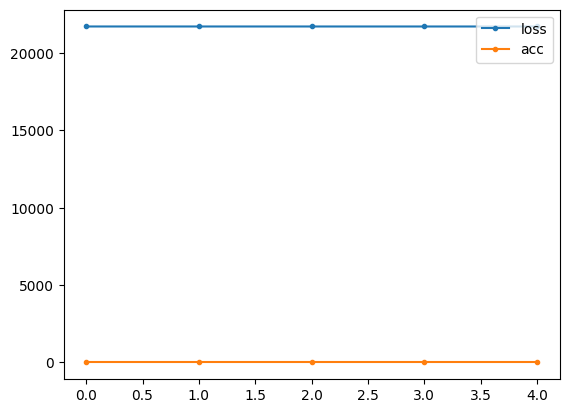

In [34]:
loss = history.history['loss']
acc = history.history['accuracy']

plt.plot(loss, marker='.', label='loss')
plt.plot(acc, marker='.', label='acc')
plt.legend(loc='upper right')

Epoch 1/5
1/1 [==============================] - 0s 316ms/step - loss: 21701.3164 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 20973.8965 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 20256.0859 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 19541.9258 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 18827.0957 - accuracy: 0.0000e+00
Epoch 1/5
1/1 [==============================] - 0s 365ms/step - loss: 32851.8945 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 32744.2617 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 32637.2539 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 32530.8711 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 

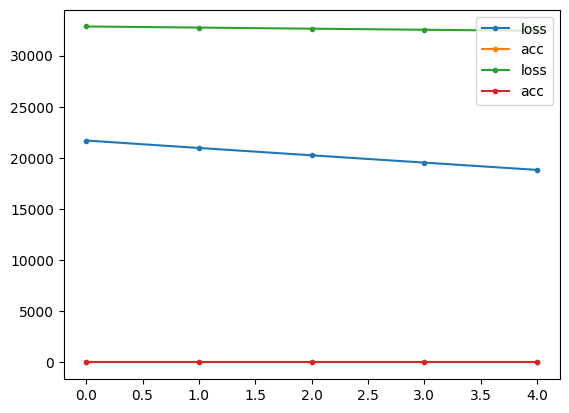

In [35]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu')) # input
# model.add(Dense(5, activation='relu')) # hidden
model.add(Dense(500)) # output
# model.add(Dense(1, activation='sigmoid')) # output

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(x,y, epochs=5)

big_loss = history.history['loss']
big_acc = history.history['accuracy']

plt.plot(big_loss, marker='.', label='loss')
plt.plot(big_acc, marker='.', label='acc')

model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu')) # input
# model.add(Dense(5, activation='relu')) # hidden
model.add(Dense(5)) # output
# model.add(Dense(1, activation='sigmoid')) # output

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(x,y, epochs=5)

small_loss = history.history['loss']
small_acc = history.history['accuracy']

plt.plot(small_loss, marker='.', label='loss')
plt.plot(small_acc, marker='.', label='acc')
plt.legend(loc='upper right')

### [4-2] 이진분류
- y값이 0또는 1 (true,false 또는 yes,no) 중에 1개 값
- 활성화함수 계산결과가 0~1 사이값이 나올 수 있도록 하고 (sigmoide가 일반적으로 사용됨) <br>
그 숫자값을 0 또는 1로 변경하는 계산식을 사용자가 작성 (예를들어 0.5이상이면 1, 미만이면 0) <br>
이때 0.5를 임곗값이라고 함 (임곗값은 사용자가 지정)

In [39]:
# 판다스를 array로 변경
key = [180.5,165,160,170,180]
age = [20,15,35,15,40]
혈압유무 = [0,1,1,1,0]

df = pd.DataFrame({'key':key, 'age':age, '혈압유무':혈압유무})
x = df[['key','age']].values
x = x.astype('float32')
y = df['혈압유무'].values

In [46]:
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu')) # input
model.add(Dense(1, activation='sigmoid')) # output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs=5)

print('------------')
print(model.predict(x))

print('------------')
newX = [180,35]
newX = np.reshape(newX, (1,-1))
result = model.predict(newX)

if result > 0.5:
    print('혈압조심')
else:
    print('정상')

Epoch 1/5
1/1 [==============================] - 0s 347ms/step - loss: 19.6023 - accuracy: 0.6000
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 19.3743 - accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 19.1463 - accuracy: 0.6000
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 18.9183 - accuracy: 0.6000
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 18.6903 - accuracy: 0.6000
------------
1/1 [==============================] - 0s 46ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
------------
1/1 [==============================] - 0s 68ms/step
혈압조심


### [4-4] 다항분류
- y값이 2개이상의 카테고리중 어떤 카테고리인가를 분류 <br>
예) 색상이 [R, G, B] 일때 R->[1,0,0] / G->[0,1,0] / B->[0,0,1]

In [48]:
# 판다스를 array로 변경
key = [180.5,165,160,170,180]
age = [20,15,35,15,40]
혈압정도 = [0,5,1,2,1] # 5점척도 중 어디인가 (카테고리)

df = pd.DataFrame({'key':key, 'age':age, '혈압정도':혈압정도})
x = df[['key','age']].values
x = x.astype('float32')
y = df['혈압정도'].values

##### 소프트맥스에 사용되는 y값에 대하여
- 원핫인코딩 되어 있거나, 해야함
- 혈압정도 0~5사이값을 사용하면 준비하는 비트 6개
    - 혈압 0, [1,0,0,0,0,0]
    - 혈압 1, [0,1,0,0,0,0]
    - 혈압 2, [0,0,1,0,0,0]
    - 혈압 3, [0,0,0,1,0,0]
    - 혈압 4, [0,0,0,0,1,0]
    - 혈압 5, [0,0,0,0,0,1]
- model.predict는 6개의 비트 각 자리에 확률값으로 나옴 (총합 1)
- 원핫인코딩 되있으면 : categorical_crossentropy
- 원핫인코딩 안되있으면 : sparse_categorical_crossentropy

In [52]:
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu')) # input
model.add(Dense(6, activation='softmax')) # output

# 원핫인코딩 되있으면 : categorical_crossentropy
# 원핫인코딩 안되있으면 : sparse_categorical_crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs=5)

print('------------')
print(model.predict(x))

print('------------')
newX = [180,35]
newX = np.reshape(newX, (1,-1))
result = model.predict(newX)
predict_num = np.argmax(result)

class_name = ['안전','보통','경증','경고','위험','중증']
class_name[predict_num]

Epoch 1/5
1/1 [==============================] - 0s 262ms/step - loss: 29.5945 - accuracy: 0.2000
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 29.4039 - accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 29.2140 - accuracy: 0.2000
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 29.0247 - accuracy: 0.2000
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 28.8360 - accuracy: 0.2000
------------
1/1 [==============================] - 0s 152ms/step
[[1.00000000e+00 2.99269209e-13 3.91973403e-23 1.18335975e-23
  1.38754851e-28 3.49226173e-22]
 [1.00000000e+00 1.88228404e-12 1.05163211e-21 3.42564300e-22
  8.28316431e-27 8.15016776e-21]
 [1.00000000e+00 2.28056990e-10 5.60608467e-18 2.22675015e-18
  3.55705384e-22 3.02000333e-17]
 [1.00000000e+00 7.60003985e-13 2.07633125e-22 6.51465128e-23
  1.10236243e-27 1.72369233e-21]
 [1.00000000e+00 1.60302344e-11 4.85221207e-20 1.72695101e-20
  9.702016

'안전'

In [50]:
np.sum(model.predict(x), axis=1)

1/1 [==============================] - 0s 32ms/step


array([0.99999994, 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)